# Playground

In [4]:
import numpy as np
import networkx as nx
import csv

np.set_printoptions(precision=3)
n=10
p=0.1

A_prob = np.random.rand(n,n)
print(A_prob)

A = (A_prob < p).astype('int')
print(A)

[[0.997 0.498 0.985 0.031 0.097 0.799 0.551 0.717 0.055 0.592]
 [0.91  0.752 0.616 0.941 0.153 0.787 0.043 0.258 0.89  0.844]
 [0.308 0.325 0.118 0.958 0.116 0.222 0.479 0.322 0.695 0.443]
 [0.932 0.849 0.898 0.201 0.66  0.312 0.81  0.575 0.763 0.013]
 [0.679 0.982 0.047 0.757 0.777 0.234 0.637 0.871 0.294 0.041]
 [0.268 0.337 0.838 0.305 0.513 0.837 0.255 0.796 0.281 0.642]
 [0.904 0.573 0.037 0.467 0.898 0.524 0.175 0.803 0.353 0.95 ]
 [0.791 0.062 0.05  0.233 0.037 0.827 0.379 0.376 0.333 0.351]
 [0.113 0.126 0.976 0.661 0.312 0.694 0.706 0.775 0.633 0.271]
 [0.324 0.85  0.69  0.632 0.343 0.68  0.467 0.795 0.197 0.224]]
[[0 0 0 1 1 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 1 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


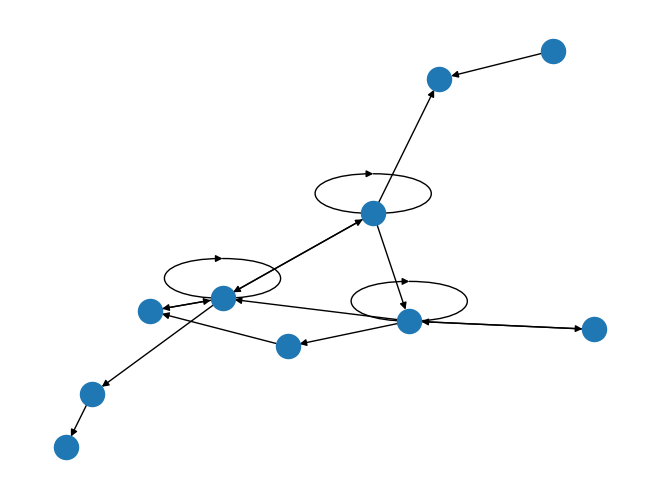

In [2]:
G = nx.DiGraph(np.array(A))
# G = nx.from_numpy_array(A)
nx.draw(G)

# File Generation

In [17]:
# Function for generating a CSV file containing an Erdos-Renyi network
def erdos_reyni_csv_generator(num_nodes, probability, ERY_filename):
    G = nx.erdos_renyi_graph(num_nodes, probability)
    with open(ERY_filename, 'w', newline='') as file:
        writer = csv.writer(file)
        for edge in G.edges:
            # file.write(f"{edge[0]},{edge[1]}\n")
            writer.writerow(edge)

# Example usage: Generate an Erdos-Renyi graph with 10,000 nodes and edge probability 0.1 and save it to erdos_reyni_network.csv
num_nodes = 10_000
probability = 0.1
ERY_filename = 'erdos_reyni_network.csv'

erdos_reyni_csv_generator(num_nodes, probability, ERY_filename)
print(f"Erdos-Renyi graph generated successfully with {num_nodes} nodes and edge probability {probability} saved to {ERY_filename}!")

Erdos-Renyi graph generated successfully with 10000 nodes and edge probability 0.1 saved to erdos_reyni_network.csv!


In [5]:
# Function for generating a Barabasi-Albert network in CSV format
def barabasi_albert_csv_generator(num_nodes, num_edges_to_attach, filename):
    G = nx.barabasi_albert_graph(num_nodes, num_edges_to_attach)
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        for edge in G.edges:
            writer.writerow(edge)

# Example usage:
num_nodes = 100  # Number of nodes in the network
num_edges_to_attach = 3  # Number of edges to attach from a new node to existing nodes
filename = "barabasi_albert_network.csv"  # Output filename

barabasi_albert_csv_generator(num_nodes, num_edges_to_attach, filename)
print(f"Barabási-Albert network with {num_nodes} nodes and {num_edges_to_attach} edges to attach saved to {filename}.")

Barabási-Albert network with 100 nodes and 3 edges to attach saved to barabasi_albert_network.csv.


In [8]:
# Generate a Watts-Strogatz network in CSV format
def watts_strogatz_csv_generator(num_nodes, k, p, filename):
    G = nx.watts_strogatz_graph(num_nodes, k, p)
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        for edge in G.edges:
            writer.writerow(edge)

# Example usage:
num_nodes = 100  # Number of nodes in the network
k = 4  # Each node is connected to k nearest neighbors in a ring topology
p = 0.1  # Probability of rewiring each edge
filename = "watts_strogatz_network.csv"  # Output filename

watts_strogatz_csv_generator(num_nodes, k, p, filename)
print(f"Watts-Strogatz network with {num_nodes} nodes, k={k}, and p={p} saved to {filename}.")

Watts-Strogatz network with 100 nodes, k=4, and p=0.1 saved to watts_strogatz_network.csv.


# Simulation 

In [6]:
import random

# Reading the above network generated file 
def load_graph_from_csv(filename):
    G = nx.Graph()
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            node1, node2 = row
            G.add_edge(node1, node2)
    return G

# A function to simulate the infection process
def simulate_infection(graph, p, inital_infected):
    infected = set(inital_infected) # set to allow no duplicates 
    rounds = 0
    while len(infected) < len(graph.nodes):
        new_infected = set()
        for node in infected:
            neighbors = list(graph.neighbors(node))
            random.shuffle(neighbors)
            for neighbor in neighbors:
                if random.random() < p:
                    new_infected.add(neighbor)
        
        infected.update(new_infected)
        rounds += 1
    return rounds

In [7]:
# Main function to run the simulation
def main():
    filename = input("Enter the filename of the CSV file for the graph: ") # first input
    p = float(input("Enter the probability value (p): "))  # second input
    initial_infected = input("Enter the initial infected node(s) separated by commas: ").split(',') # third input

    graph = load_graph_from_csv(filename)

    num_simulations = 10
    total_time = 0
    for _ in range(num_simulations):
        time_taken = simulate_infection(graph, p, initial_infected)
        total_time += time_taken

    average_time = total_time / num_simulations
    print("Average time taken to infect all nodes:", average_time)

if __name__ == "__main__":
    main()

Average time taken to infect all nodes: 23.0


TODO - 
1. Different test cases
2. graph visualizations
3. Analysis Report